<a href="https://colab.research.google.com/github/Elfeny7/PCVK_Sem5/blob/main/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ikmal Faris Musyaffa / 2141720123 / 12 / 3B

PCVK Minggu2

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pylab as plt

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


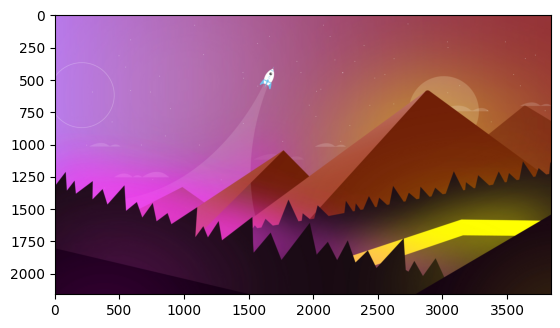

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/gambar.jpg')
plt.imshow(img)

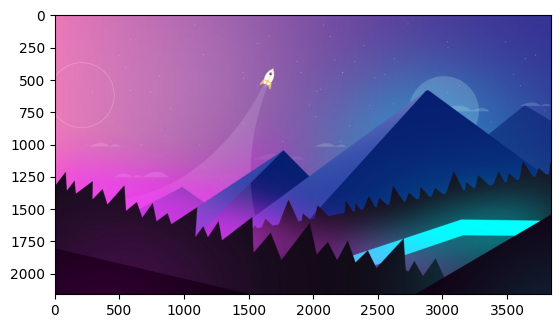

In [ ]:
img2 = img
img3 = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img3)

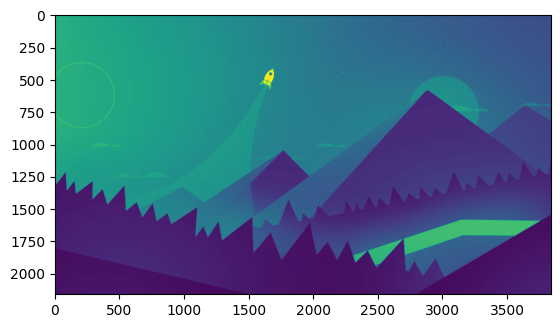

In [ ]:
img_gray = cv.imread('/content/drive/MyDrive/PCVK/Images/gambar.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(img_gray)

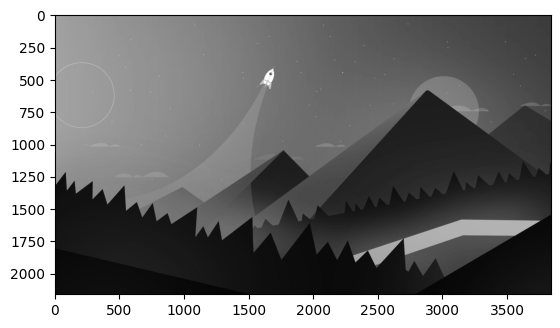

In [ ]:
plt.imshow(img_gray, cmap='gray')

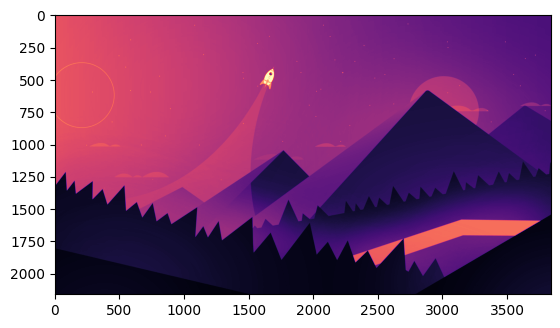

In [ ]:
plt.imshow(img_gray, cmap='magma')

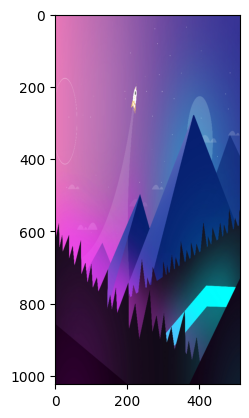

In [ ]:
img4 = cv.resize(cv.cvtColor(img,cv.COLOR_BGR2RGB), (512,1024))
plt.imshow(img4)

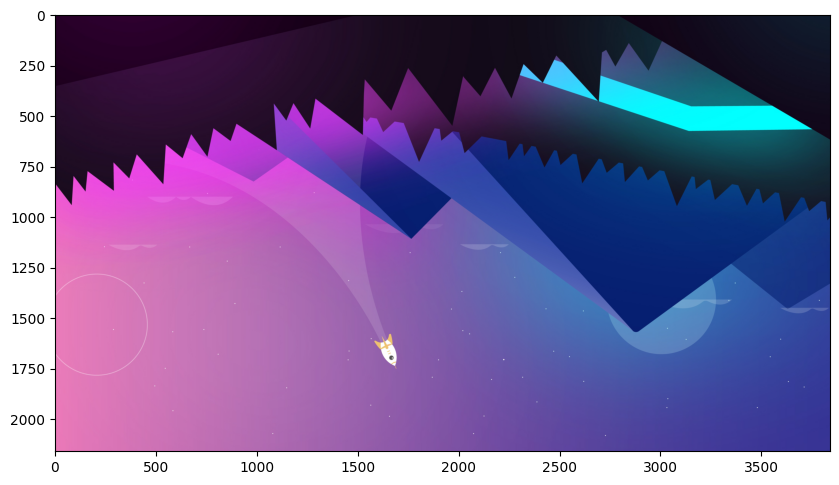

In [ ]:
img5 = cv.flip(cv.cvtColor(img,cv.COLOR_BGR2RGB),0)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.imshow(img5)

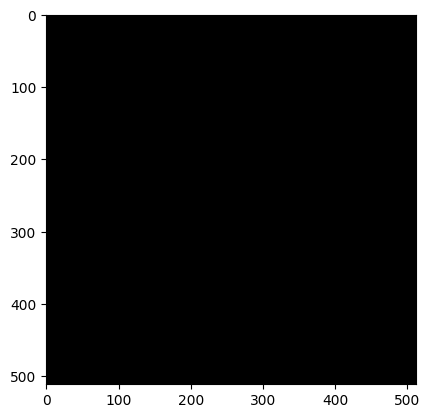

In [ ]:
black_img = np.zeros(shape=(512,512,3),dtype=np.int16)
plt.imshow(black_img)

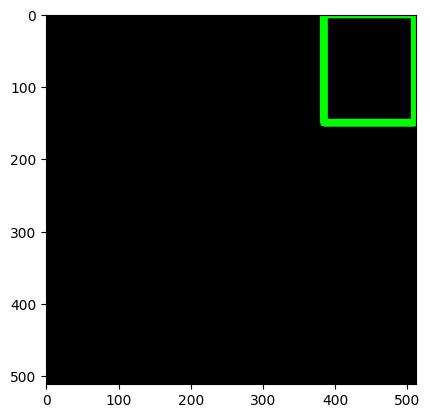

In [ ]:
cv.rectangle(black_img,pt1=(384,0),pt2=(510,150),color=(0,255,0),thickness=10)
plt.imshow(black_img)

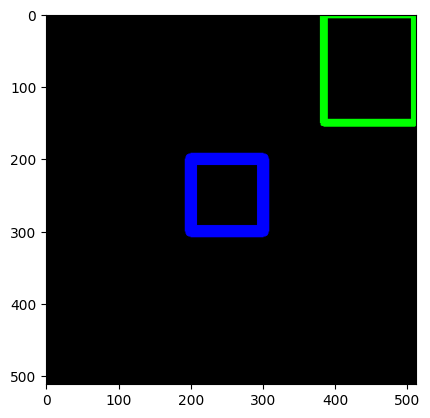

In [ ]:
cv.rectangle(black_img,pt1=(200,200),pt2=(300,300),color=(0,0,255),thickness=15)
plt.imshow(black_img)

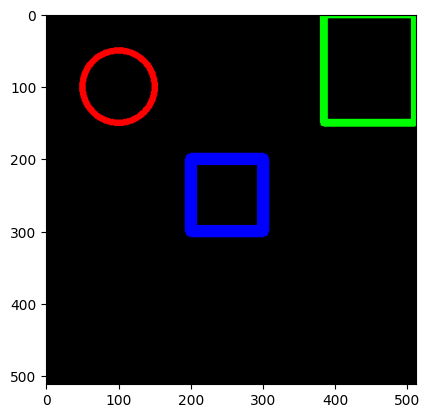

In [ ]:
cv.circle(black_img,center=(100,100),radius=50,color=(255,0,0),thickness=8)
plt.imshow(black_img)

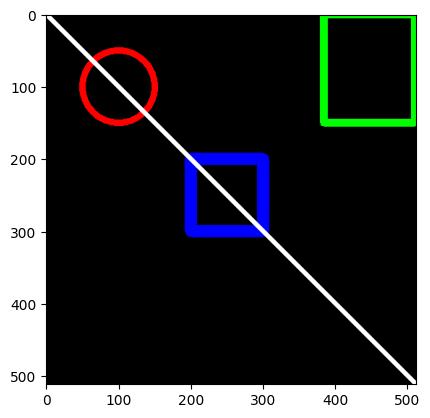

In [ ]:
cv.line(black_img,pt1=(0,0),pt2=(512,512),color=(255,255,255),thickness=5)
plt.imshow(black_img)

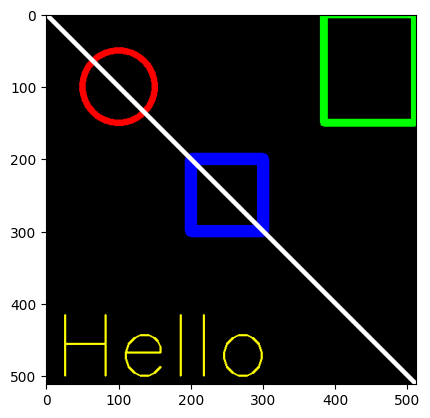

In [ ]:
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(black_img,text='Hello',org=(10,500),fontFace=font,fontScale=4,color=(255,255,0),thickness=2,lineType=cv.LINE_AA)
plt.imshow(black_img)

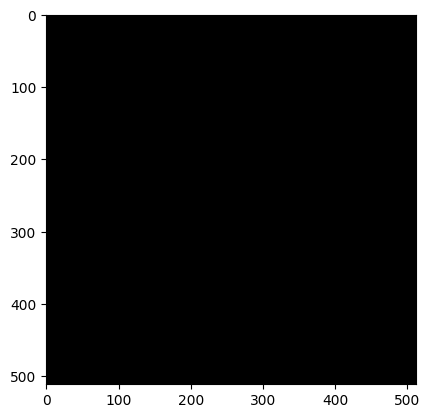

In [ ]:
black_img2=np.zeros(shape=(512,512,3),dtype=np.int32)
plt.imshow(black_img2)

In [ ]:
vertices = np.array([[100,300],[200,200],[400,300],[200,400]],dtype=np.int32)
vertices

array([[100, 300],
       [200, 200],
       [400, 300],
       [200, 400]], dtype=int32)

In [ ]:
pts = vertices.reshape((-1,1,2))
pts

array([[[100, 300]],

       [[200, 200]],

       [[400, 300]],

       [[200, 400]]], dtype=int32)

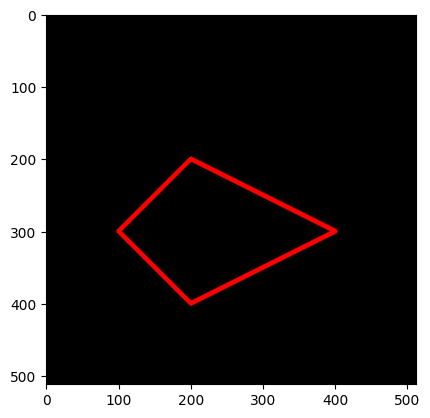

In [ ]:
cv.polylines(black_img2,[pts],isClosed=True,color=(255,0,0),thickness=5)
plt.imshow(black_img2)

###**Pertanyaan**

1. Apakah perbedaan gambar yang ditampilkan tanpa dan dengan matplotlib?

Jawab :

**Terdapat ukuran 0-width dan 0-height seperti penggaris**

2. Apakah perbedaan dan pengaruhnya pembuatan black image antara tipe data int16
dan int32?

Jawab :

**Tidak ada**

3. Apakah kegunaan “google.colab.patches import cv2_imshow” pada potongan kode
berikut

Jawab :

**Untuk menampilkan gambar tanpa jendela pop up terpisah**

4. Apakah kegunaan “skimage import io” pada potongan kode soal nomor 3

Jawab :

**Untuk memproses gambar (menulis, menampilkan, dll)**

###**TUGAS**

1. Dengan menggunakan figsize, perhatikan apakah ukuran image pixelnya juga
berubah?

Jawab :

**Tidak berubah, hanya mengubah tampilan gambar, tidak mempengaruhi pixel**

2. Tampilkan image dalam channel Red-Blue dan Green-Blue saja!

Jawab :

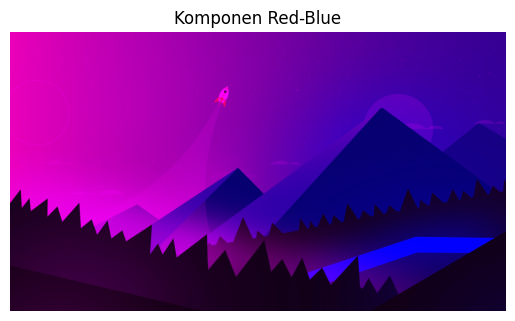

In [ ]:
red_blue_img = img2.copy()
red_blue_img[:, :, 1] = 0  # Menonaktifkan saluran hijau (green channel)

# Menampilkan gambar merah-biru
plt.imshow(cv.cvtColor(red_blue_img, cv.COLOR_BGR2RGB))
plt.title('Komponen Red-Blue')
plt.axis('off')
plt.show()

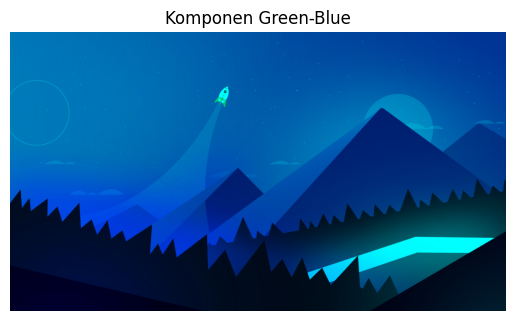

In [ ]:
green_blue_img = img2.copy()
green_blue_img[:, :, 2] = 0  # Menonaktifkan saluran merah (red channel)

# Menampilkan gambar hijau-biru
plt.imshow(cv.cvtColor(green_blue_img, cv.COLOR_BGR2RGB))
plt.title('Komponen Green-Blue')
plt.axis('off')
plt.show()

3. Tampilkan image baris ke 20-115, kolom 25-120

Jawab :

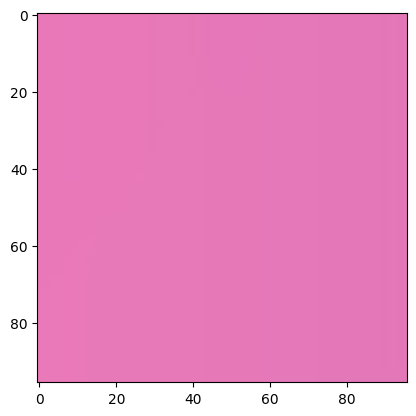

In [ ]:
cropped_img = img[20:116, 25:121]
cropped_rgb_img = cv.cvtColor(cropped_img, cv.COLOR_BGR2RGB)
plt.imshow(cropped_rgb_img)

4. Tampilkan image baris ke 5-30, semua kolom, channel Red saja!

Jawab :

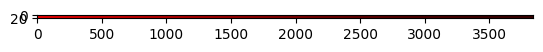

In [ ]:
cropped_img2 = img[5:30, :]
cropped_img2[:, :, 1] = 0
cropped_img2[:, :, 0] = 0
cropped_rgb_img2 = cv.cvtColor(cropped_img2, cv.COLOR_BGR2RGB)
plt.imshow(cropped_rgb_img2)

5. Buat 5 kotak berbagai ukuran dan warna yang berbeda dalam satu image.
disarankan menggunakan bilangan acak/random!

Jawab:

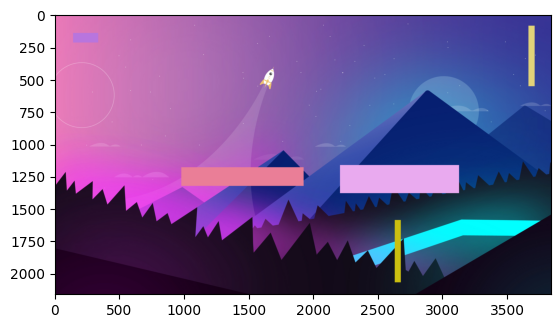

In [ ]:
import random

num_boxes = 5

img_berkotak = img3.copy()

for _ in range(num_boxes):
    box_width = random.randint(10, 1000)
    box_height = random.randint(10, 1000)

    x = random.randint(0, img_berkotak.shape[1] - box_width)
    y = random.randint(0, img_berkotak.shape[0] - box_height)

    color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

    cv.rectangle(img_berkotak, (x, y), (x + box_width, y + box_height), color, -1)  # -1 mengisi kotak dengan warna

plt.imshow(img_berkotak)
cv.waitKey(0)
cv.destroyAllWindows()

6. Tampilkan image dengan posisi terbalik!

Jawab :

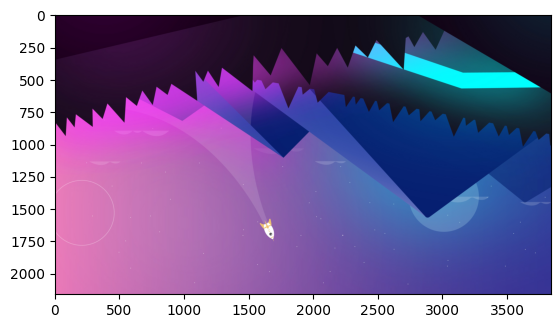

In [ ]:
img_terbalik = cv.flip(img3.copy(),0)
plt.imshow(img_terbalik)

7. Buat rectangle dan circle pada bagian wajah dari image foto anda saat
beraktifitas (bukan pasfoto).

Jawab :

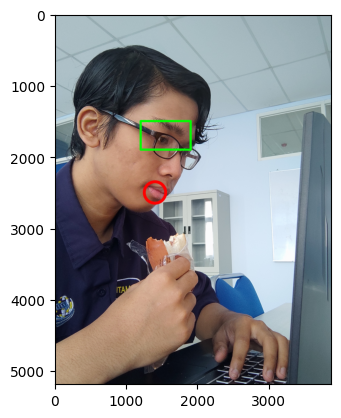

In [ ]:
imgsaya = cv.imread('/content/drive/MyDrive/PCVK/Images/gambarsaya.jpg')
imgsaya2 = cv.cvtColor(imgsaya,cv.COLOR_BGR2RGB)
cv.rectangle(imgsaya2,pt1=(1900,1500),pt2=(1200,1900),color=(0,255,0),thickness=30)
cv.circle(imgsaya2,center=(1400,2500),radius=150,color=(255,0,0),thickness=40)
plt.imshow(imgsaya2)

8. Buat rectangle pada bagian sudut bawah kiri channel B pada color space RGB
dari citra kitten/ lena/ mandrill/ male/ female/ couple/ sailboat/ peppers!

Jawab :

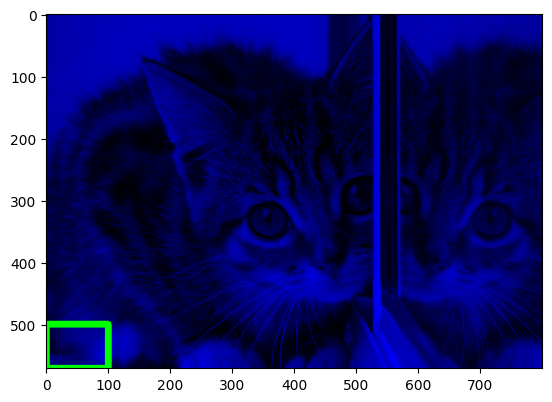

In [ ]:
urls = ["https://placekitten.com/800/571"]
for url in urls:
  kittenimg = io.imread(url)
  bluekitten = kittenimg.copy()
  bluekitten[:, :, 1] = 0
  bluekitten[:, :, 0] = 0
  height = bluekitten.shape[0]
  width = bluekitten.shape[1]
  cv.rectangle(bluekitten,pt1=(100,height),pt2=(0,500),color=(0,255,0),thickness=10)
  plt.imshow(bluekitten)

9. Lengkapi tulisan nama file pada file citra dari soal no.8. gunakan font, ukuran font, dan warna font yang sesuai keinginan anda

Jawab:

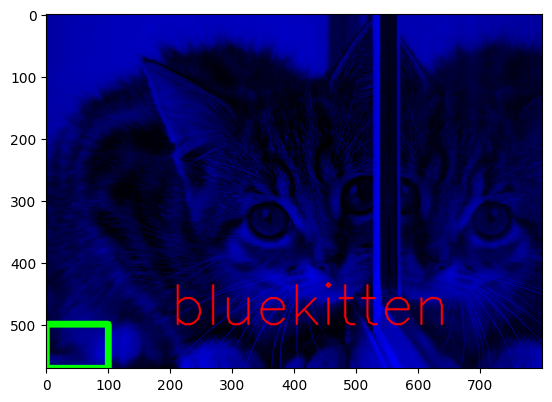

In [ ]:
urls = ["https://placekitten.com/800/571"]
for url in urls:
  kittenimg = io.imread(url)
  bluekitten = kittenimg.copy()
  bluekitten[:, :, 1] = 0
  bluekitten[:, :, 0] = 0
  height = bluekitten.shape[0]
  width = bluekitten.shape[1]
  cv.rectangle(bluekitten,pt1=(100,height),pt2=(0,500),color=(0,255,0),thickness=10)
  font = cv.FONT_HERSHEY_SIMPLEX
  cv.putText(bluekitten,text='bluekitten',org=(200,500),fontFace=font,fontScale=3,color=(255,0,0),thickness=2,lineType=cv.LINE_AA)
  plt.imshow(bluekitten)

### **TUGAS**

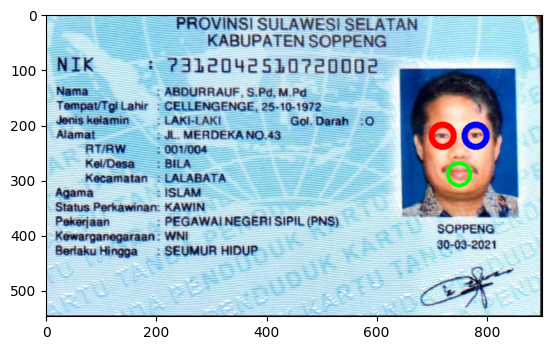

In [ ]:
ktp = cv.imread('/content/drive/MyDrive/PCVK/Images/ktp.jpeg')
ktprgb = cv.cvtColor(ktp, cv.COLOR_BGR2RGB)
cv.circle(ktprgb,center=(720,220),radius=20,color=(255,0,0),thickness=10)
cv.circle(ktprgb,center=(780,220),radius=20,color=(0,0,255),thickness=10)
cv.circle(ktprgb,center=(750,290),radius=20,color=(0,255,0),thickness=5)
plt.imshow(ktprgb)